In [15]:
#Importing essential Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from nltk.corpus import  stopwords

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading and viewing the dataset
df = pd.read_csv('messages.csv',encoding='latin-1')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


We are going to do our predictions only using one column of this dataset, i.e. the message column. Although subject can also play an important role, but a lot of times, subjects are very decieving and the email content inside contains a totally different information altogether.

In [3]:
#Dropping the subject column
df.drop('subject',axis=1,inplace=True)

In [4]:
df.head()

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


In [5]:
print ('Shape = >',df.shape)

Shape = > (2893, 2)


In [6]:
print ('0 and 1 counts','\n',df.label.value_counts())
#1 is SPAM

0 and 1 counts 
 0    2412
1     481
Name: label, dtype: int64


In [8]:
#Ratio
print ('spam ratio = ', round(len(df[df['label']==1]) / len(df.label),2)*100,'%')
print ('no spam ratio  = ', round(len(df[df['label']==0]) / len(df.label),2)*100,'%')

spam ratio =  17.0 %
no spam ratio  =  83.0 %


In [9]:
#New column for Length of message
df['length'] = df.message.str.len()
df.head(5)

,message,label,length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [10]:
# Convert all messages to lower case
df['message'] = df['message'].str.lower()

In [11]:
df.head()

,message,label,length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [12]:
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')


In [13]:
# Remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')



In [14]:
df.head()

,message,label,length
0,content length numbr apple iss research center...,0,2856
1,lang classification grimes joseph e and barbar...,0,1800
2,i am posting this inquiry for sergei atamas sa...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [16]:
# Remove stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['message'] = df['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [17]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.message.str.len()
df.head()

,message,label,length,clean_length
0,content length numbr apple iss research center...,0,2856,2179
1,lang classification grimes joseph e barbara f ...,0,1800,1454
2,posting inquiry sergei atamas satamas umabnet ...,0,1435,1064
3,colleague researching differing degrees risk p...,0,324,210
4,earlier morning phone friend mine living south...,0,1046,629


In [18]:

# Total length removal
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 9344743
Clean Length 6767857


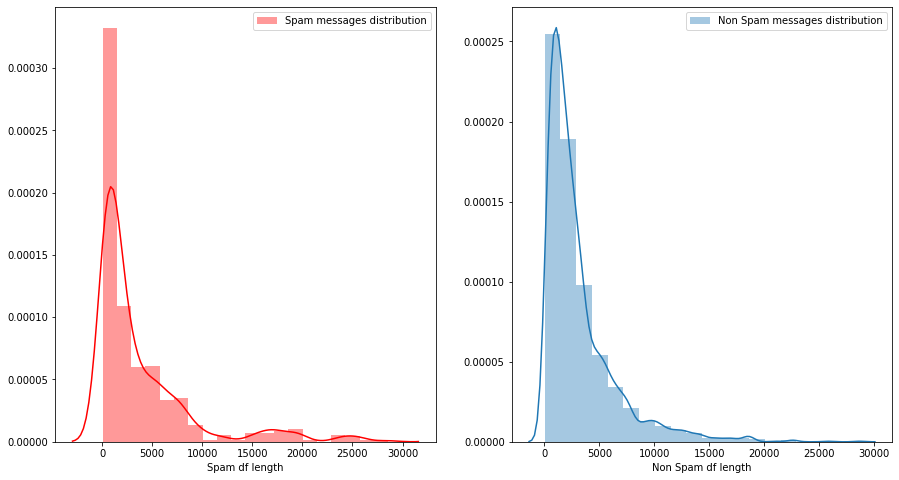

In [20]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam df length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label='Non Spam messages distribution')
ax[1].set_xlabel('Non Spam df length')
ax[1].legend()

plt.show()



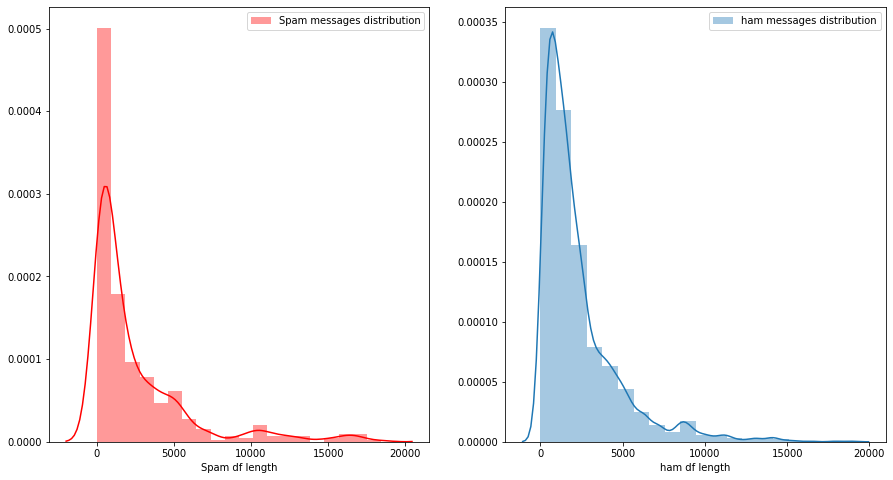

In [21]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam df length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham df length')
ax[1].legend()

plt.show()



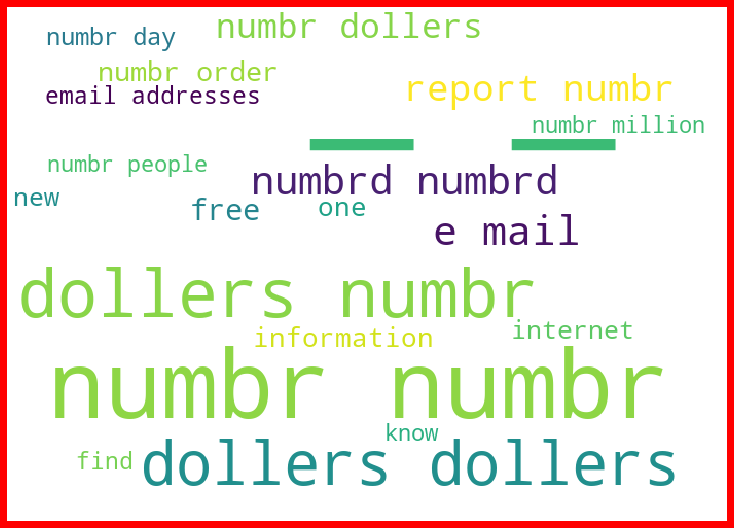

In [22]:
#Having a view loud words in spam 
from wordcloud import WordCloud


spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

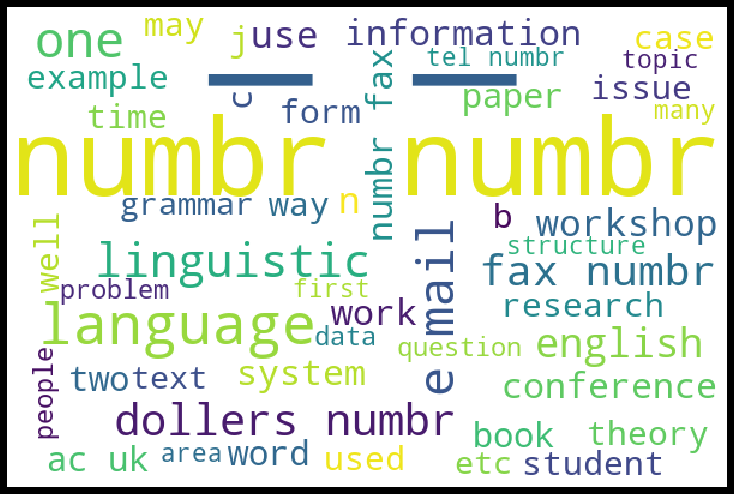

In [31]:
#Having a view of loud words in non-spam

hams = df['message'][df['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
#Converting Text to vectors using TF-IDF vectoriser :
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['message'])

features.shape

(2893, 54998)

In [34]:
#Split the data into training and testing data set: 
from sklearn.model_selection import train_test_split

X = features
y= df['label']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [35]:
#Training multiple machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

classifiers = [svc,knc,mnb,dtc,lrc,rfc]

  
    
for i in range(len(classifiers)):
    classifiers[i].fit(x_train,y_train)
    y_pred = classifiers[i].predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    classificationReport = classification_report(y_test,y_pred)
    confusionMatrix = confusion_matrix(y_test,y_pred)
    
    print("\n")
    print("*************************************************************************************")
    print("Classifier : ",classifiers[i])
    print("Accuracy : ",round((accuracy*100),2),"% ")
    print("Classification Report : \n")
    print(classificationReport)
    print("Confusion Matrix :\n ")
    print(confusionMatrix)
    print("*************************************************************************************")
    print("\n")





*************************************************************************************
Classifier :  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy :  98.79 % 
Classification Report : 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       464
           1       0.99      0.95      0.97       115

    accuracy                           0.99       579
   macro avg       0.99      0.97      0.98       579
weighted avg       0.99      0.99      0.99       579

Confusion Matrix :
 
[[463   1]
 [  6 109]]
*************************************************************************************




*************************************************************************************
Classifier :  KNeighborsClassifier(algorithm='auto', l

As we can see, Support Vector Classifier has outperformed the other models. We will go ahead with this model

In [36]:
#Creating the final model
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
classificationReport = classification_report(y_test,y_pred)
confusionMatrix = confusion_matrix(y_test,y_pred)

print("*************************************************************************************")
print("Classifier : ",svc)
print("Accuracy : ",round((accuracy*100),2),"% ")
print("Classification Report : \n")
print(classificationReport)
print("Confusion Matrix :\n ")
print(confusionMatrix)
print("*************************************************************************************")
print("\n")

*************************************************************************************
Classifier :  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy :  98.79 % 
Classification Report : 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       464
           1       0.99      0.95      0.97       115

    accuracy                           0.99       579
   macro avg       0.99      0.97      0.98       579
weighted avg       0.99      0.99      0.99       579

Confusion Matrix :
 
[[463   1]
 [  6 109]]
*************************************************************************************




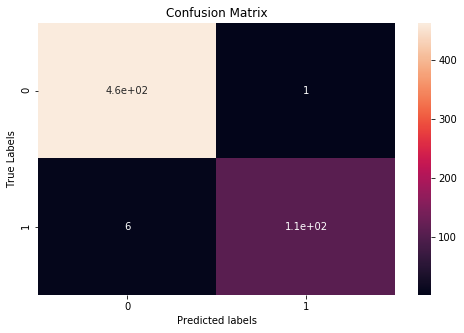

In [37]:
#ax=plt.subplot()
plt.figure(figsize=(8,5))
sns.heatmap(confusionMatrix,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True Labels")
#ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
#ax.set_title('Confusion matrix')
#ax.xaxis.set_ticklabels(['Non-Span','spam'])
#ax.yaxis.set_ticklabels(['Non-Span','spam'])
plt.show()

In [39]:
#saving the model 

import joblib

joblib.dump(svc,'emailspamclassifier.obj')

gradient_from_joblib = joblib.load('emailspamclassifier.obj')